## Data exploration & Cleaning

In [1]:
import pandas as pd

df1 = pd.read_csv("bureau_data.csv")
df1.head()

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4
2,C00003,2,1,82,24,147,6,58
3,C00004,3,0,115,15,87,5,26
4,C00005,4,2,120,0,0,5,10


In [2]:
df2 = pd.read_csv("customers.csv")
df2.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,Karnataka,560001
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,Maharashtra,411001


In [3]:
df3 = pd.read_csv("loans.csv")
df3.head()

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.0,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.0,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.0,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,L00004,C00004,Personal,Unsecured,2345000,1747000,34940.0,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,L00005,C00005,Auto,Secured,4647000,4520000,90400.0,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [4]:
df_m = pd.merge(pd.merge(df2, df1, on='cust_id'), df3, on='cust_id')

total_rows = len(df_m)
print("Total number of rows:", total_rows)

print(df_m)

Total number of rows: 50000
      cust_id  age gender marital_status employment_status   income  \
0      C00001   44      M        Married     Self-Employed  2586000   
1      C00002   38      M        Married          Salaried  1206000   
2      C00003   46      F        Married     Self-Employed  2878000   
3      C00004   55      F         Single     Self-Employed  3547000   
4      C00005   37      M        Married          Salaried  3432000   
...       ...  ...    ...            ...               ...      ...   
49995  C49996   40      F         Single          Salaried   775000   
49996  C49997   39      M         Single          Salaried  3117000   
49997  C49998   45      F         Single     Self-Employed  1329000   
49998  C49999   42      F         Single     Self-Employed   533000   
49999  C50000   55      M        Married     Self-Employed  3144000   

       number_of_dependants residence_type  years_at_current_address  \
0                         3          Owned     

In [5]:
# Check missing values

missing_values = df_m.isnull().sum()

# Sort columns by the most missing values
sorted_missing_values = missing_values.sort_values(ascending=False)

print(sorted_missing_values)

residence_type                 62
cust_id                         0
gst                             0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
net_disbursement                0
enquiry_count                   0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
credit_utilization_ratio        0
total_dpd                       0
age                             0
delinquent_months               0
total_loan_months               0
number_of_closed_accounts       0
number_of_open_accounts         0
zipcode                         0
state                           0
city                            0
years_at_current_address        0
number_of_dependants            0
income                          0
employment_sta

In [6]:
# See all categorical variable values
print(pd.unique(df_m['marital_status']))
print(pd.unique(df_m['employment_status']))
print(pd.unique(df_m['residence_type'])) # nan found
print(pd.unique(df_m['city']))
print(pd.unique(df_m['state']))
print(pd.unique(df_m['loan_purpose']))
print(pd.unique(df_m['loan_type']))
print(pd.unique(df_m['default']))

['Married' 'Single']
['Self-Employed' 'Salaried']
['Owned' 'Mortgage' 'Rented' nan]
['Delhi' 'Chennai' 'Kolkata' 'Bangalore' 'Pune' 'Jaipur' 'Lucknow'
 'Mumbai' 'Ahmedabad' 'Hyderabad']
['Delhi' 'Tamil Nadu' 'West Bengal' 'Karnataka' 'Maharashtra' 'Rajasthan'
 'Uttar Pradesh' 'Gujarat' 'Telangana']
['Auto' 'Home' 'Personal' 'Education' 'Personaal']
['Secured' 'Unsecured']
[False  True]


In [7]:

# Replace NaN with the mode (most frequent value) of the 'residence_type' column
mode_value = df_m['residence_type'].mode()[0]
df_m['residence_type'] = df_m['residence_type'].fillna(mode_value)



In [8]:
df_m.isnull().sum()

cust_id                        0
age                            0
gender                         0
marital_status                 0
employment_status              0
income                         0
number_of_dependants           0
residence_type                 0
years_at_current_address       0
city                           0
state                          0
zipcode                        0
number_of_open_accounts        0
number_of_closed_accounts      0
total_loan_months              0
delinquent_months              0
total_dpd                      0
enquiry_count                  0
credit_utilization_ratio       0
loan_id                        0
loan_purpose                   0
loan_type                      0
sanction_amount                0
loan_amount                    0
processing_fee                 0
gst                            0
net_disbursement               0
loan_tenure_months             0
principal_outstanding          0
bank_balance_at_application    0
disbursal_

In [9]:
## fix misspelled value of loan purpose
# check occurances
print(df_m['loan_purpose'].value_counts())


# Replace the misspelled values
df_m['loan_purpose'] = df_m['loan_purpose'].replace({'Personaal': 'Personal'})
print(df_m['loan_purpose'].value_counts())

loan_purpose
Personal     17457
Home         15028
Auto          9936
Education     7557
Personaal       22
Name: count, dtype: int64
loan_purpose
Personal     17479
Home         15028
Auto          9936
Education     7557
Name: count, dtype: int64


In [10]:
# Check for duplicated rows (excluding the first occurrence)
duplicated_rows = df_m[df_m.duplicated()]

# Display duplicated rows
print(duplicated_rows)

### No duplicated rows

Empty DataFrame
Columns: [cust_id, age, gender, marital_status, employment_status, income, number_of_dependants, residence_type, years_at_current_address, city, state, zipcode, number_of_open_accounts, number_of_closed_accounts, total_loan_months, delinquent_months, total_dpd, enquiry_count, credit_utilization_ratio, loan_id, loan_purpose, loan_type, sanction_amount, loan_amount, processing_fee, gst, net_disbursement, loan_tenure_months, principal_outstanding, bank_balance_at_application, disbursal_date, installment_start_dt, default]
Index: []

[0 rows x 33 columns]


In [11]:
df_m.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.0,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.0,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2170000,43400.0,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,1747000,34940.0,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,4520000,90400.0,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [12]:
# Check data types of each column
print(df_m.dtypes)

# all data types look okay

cust_id                         object
age                              int64
gender                          object
marital_status                  object
employment_status               object
income                           int64
number_of_dependants             int64
residence_type                  object
years_at_current_address         int64
city                            object
state                           object
zipcode                          int64
number_of_open_accounts          int64
number_of_closed_accounts        int64
total_loan_months                int64
delinquent_months                int64
total_dpd                        int64
enquiry_count                    int64
credit_utilization_ratio         int64
loan_id                         object
loan_purpose                    object
loan_type                       object
sanction_amount                  int64
loan_amount                      int64
processing_fee                 float64
gst                      

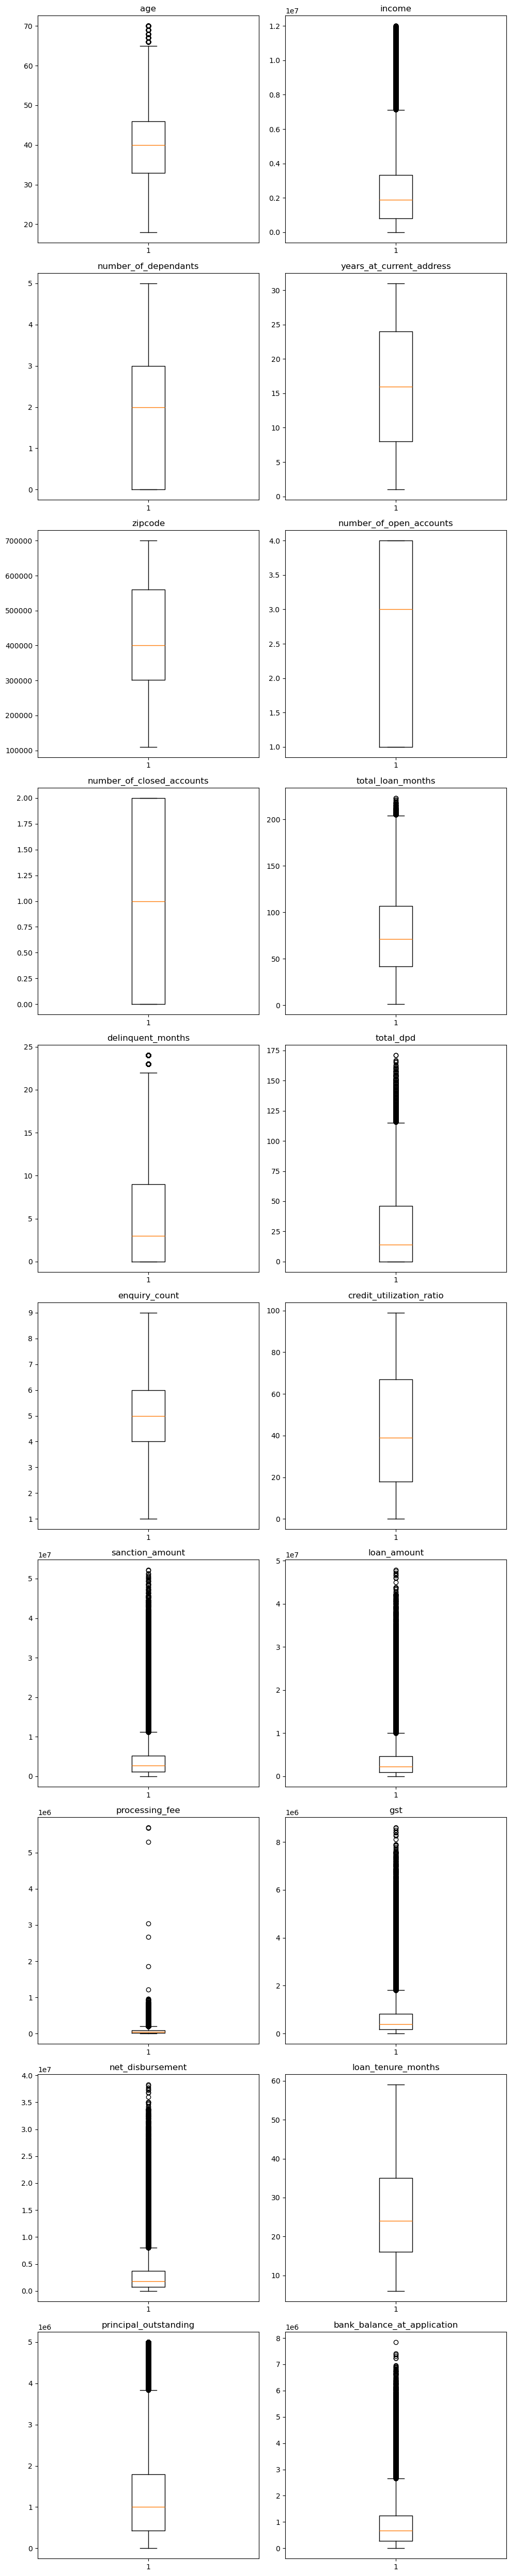

In [13]:
## Box plots for seeing outliers for numrical columns

import matplotlib.pyplot as plt
import math

numeric_df = df_m.select_dtypes(include=['number'])

# Calculate grid dimensions for two subplots per row
num_cols = len(numeric_df.columns)
cols_per_row = 2
rows = math.ceil(num_cols / cols_per_row)

# Create subplots
fig, axes = plt.subplots(rows, cols_per_row, figsize=(10, 5 * rows), sharey=False)

# Flatten axes for easier iteration
axes = axes.flatten()

# Plot each numeric column
for i, col in enumerate(numeric_df.columns):
    axes[i].boxplot(numeric_df[col])
    axes[i].set_title(col)
    axes[i].set_xticks([1])
    #axes[i].set_xticklabels([col], rotation=90)  # Vertical x-axis labels

# Remove unused subplots
for j in range(num_cols, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

# small outliers = total_loan_months, principal_outstanding
# med outliers = income, total_dpd
# large outliers = santion_amount, loan_amount, processing_fee, gst, net_disbursement, bank_balance_at_application

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


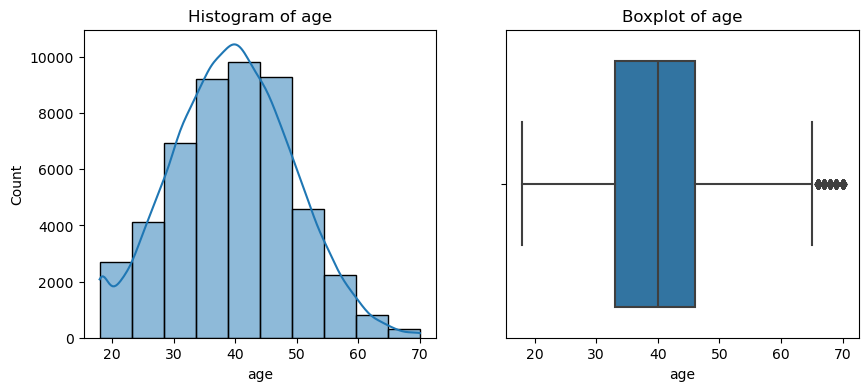

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


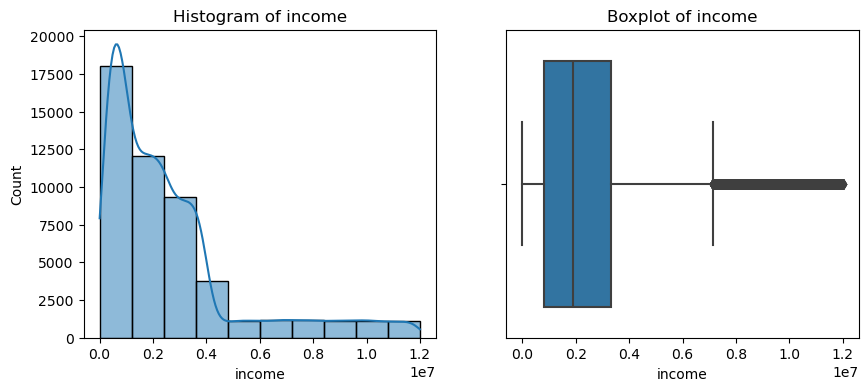

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


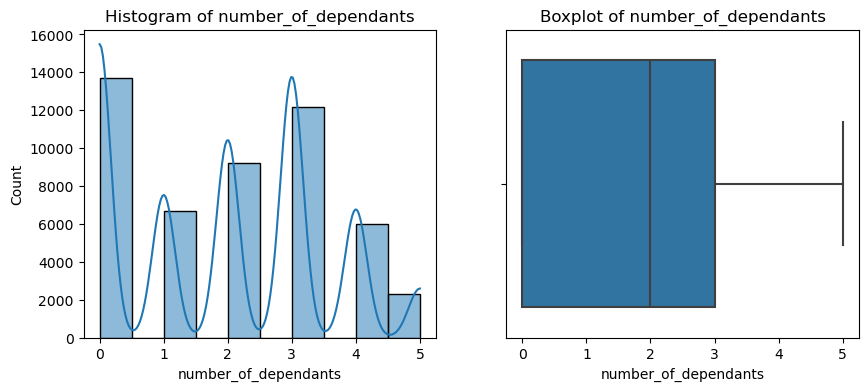

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


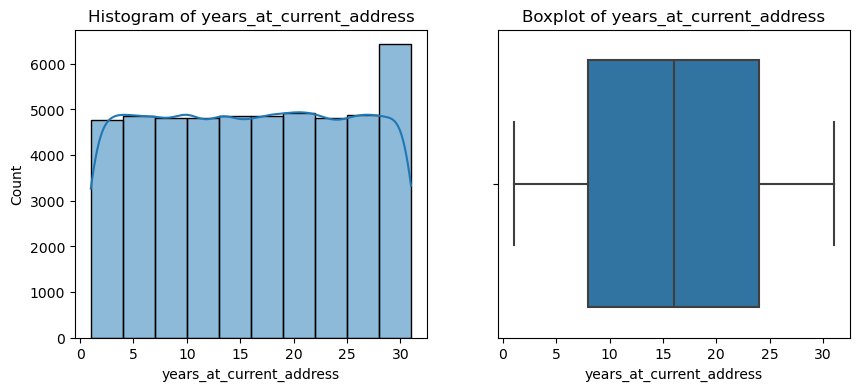

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


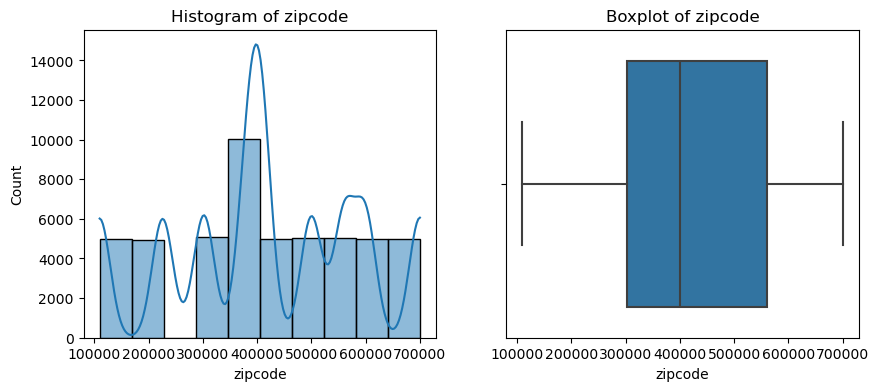

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


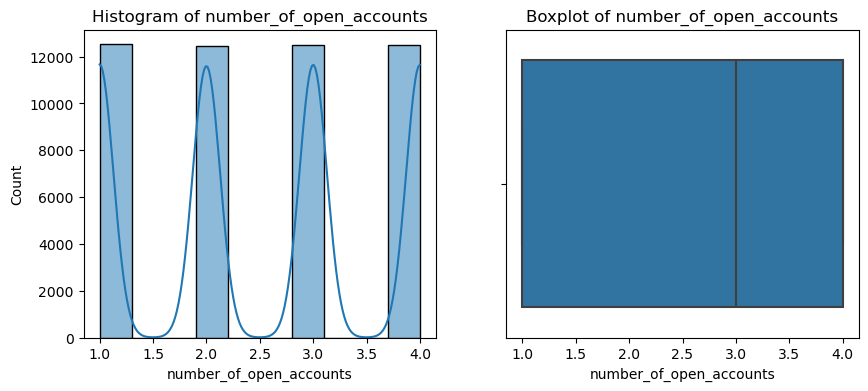

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


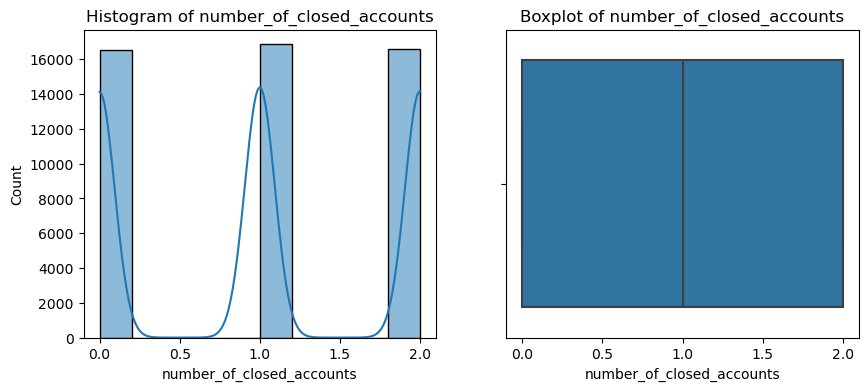

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


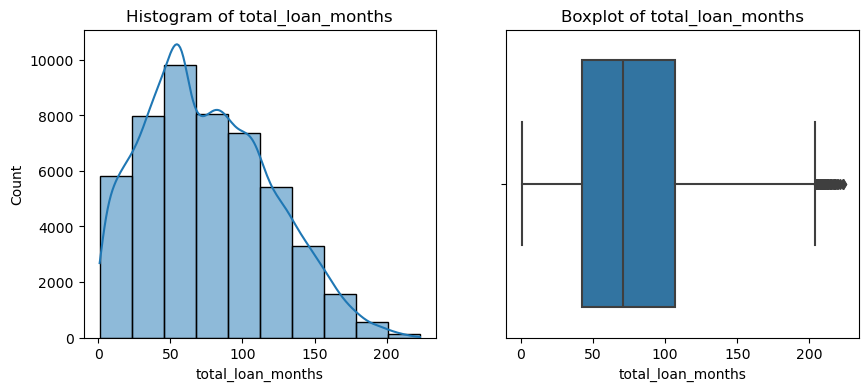

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


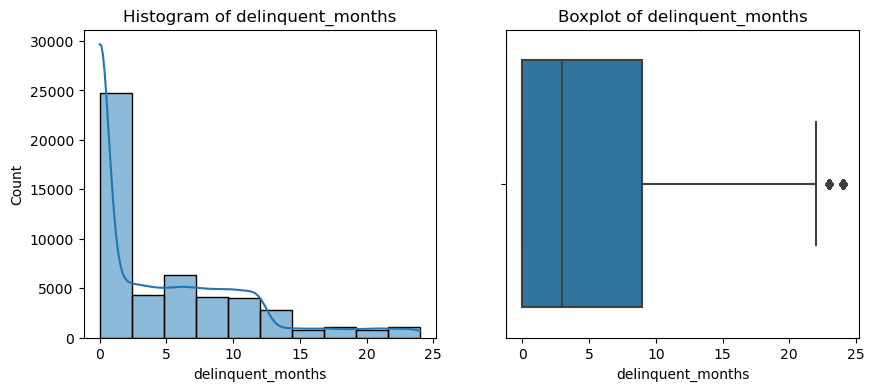

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


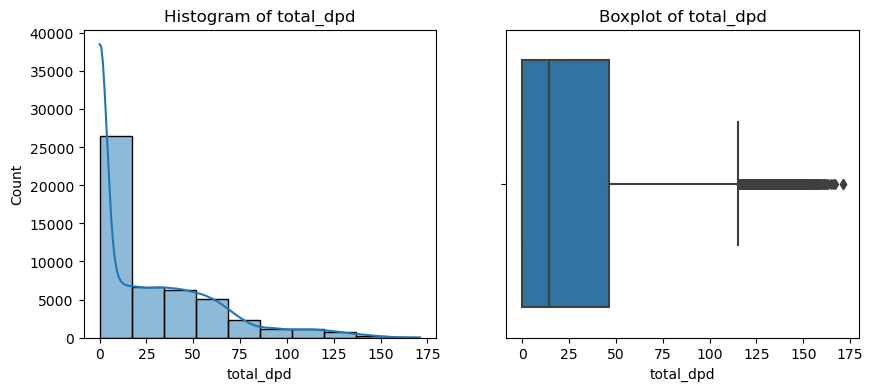

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


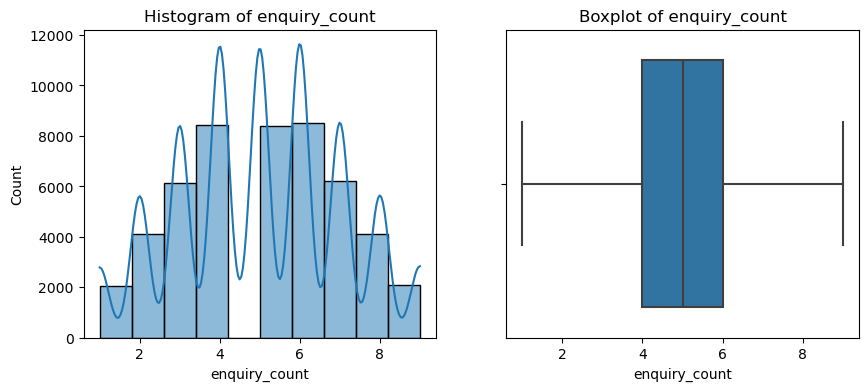

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


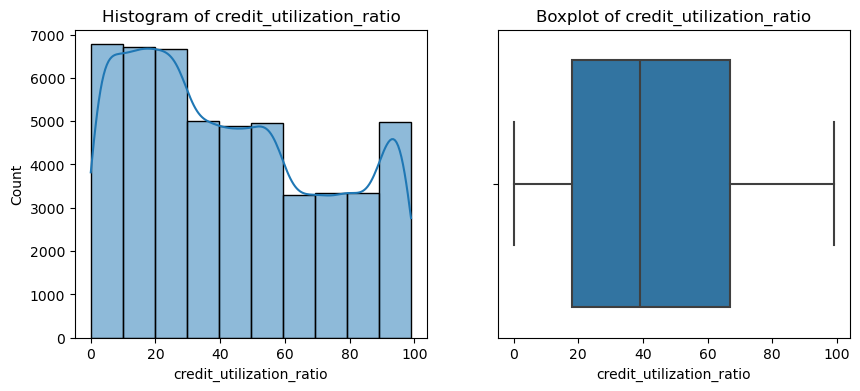

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


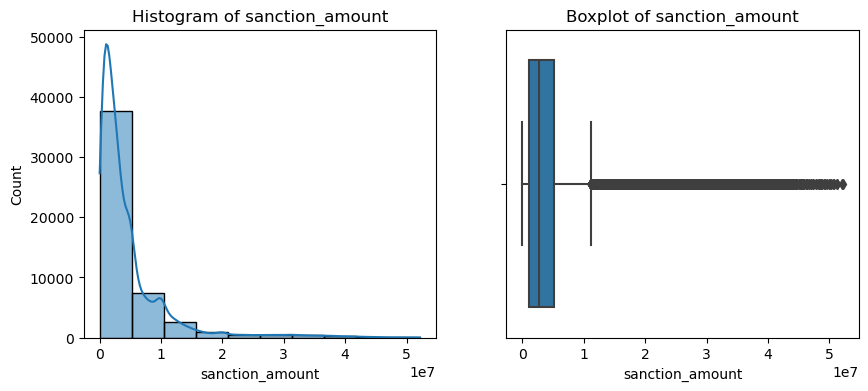

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


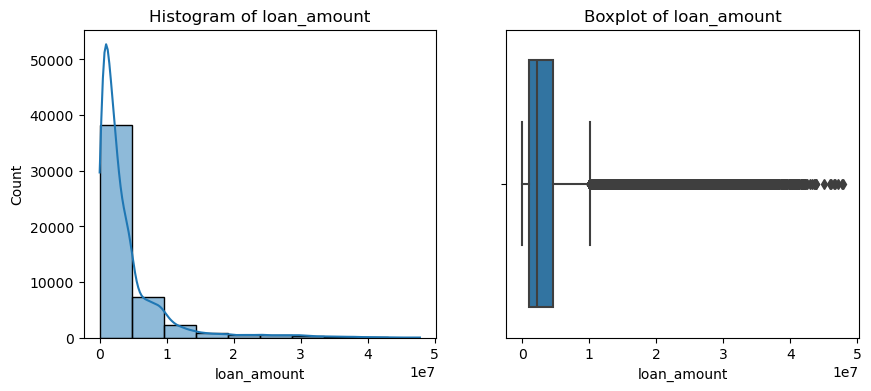

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


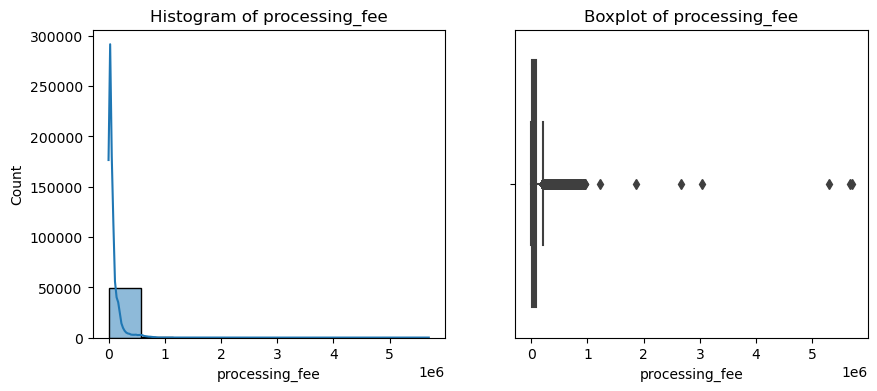

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


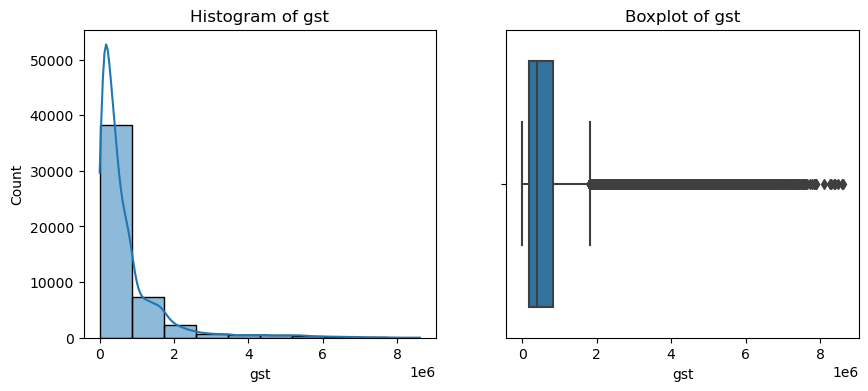

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


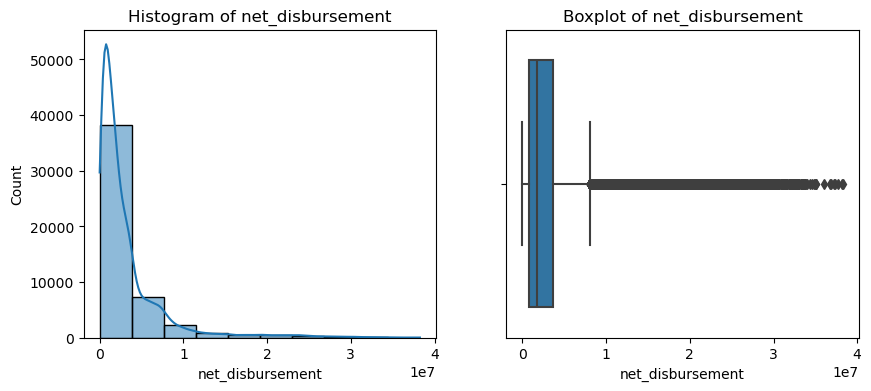

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


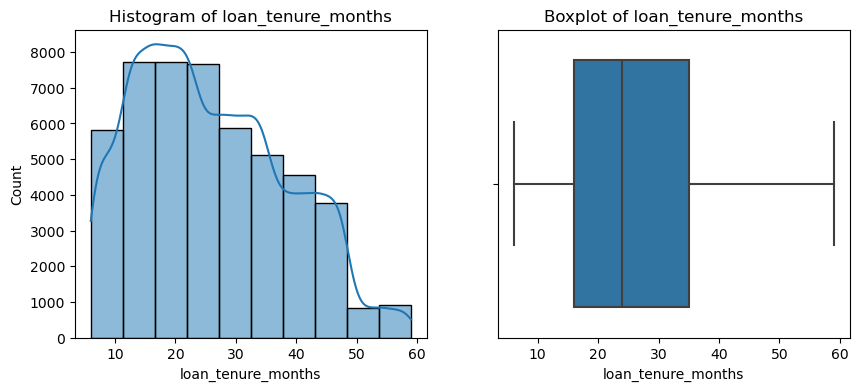

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


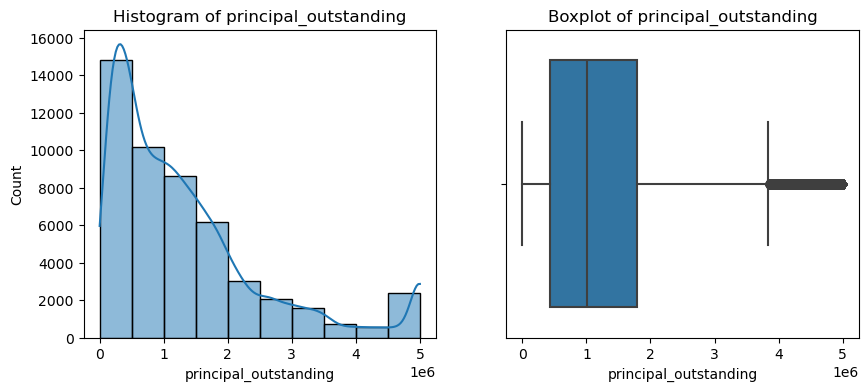

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


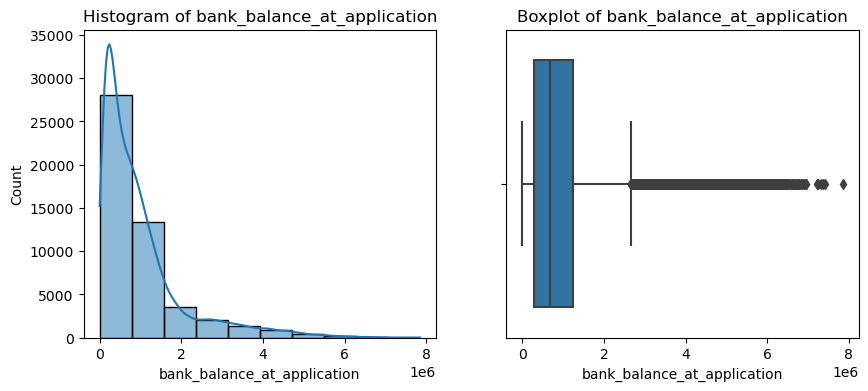

In [ ]:
## univariate analysis for numerical columns

import seaborn as sns

for column in df_m.select_dtypes(include='number').columns:
    plt.figure(figsize=(10, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_m[column], kde=True, bins=10)
    plt.title(f'Histogram of {column}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_m[column])
    plt.title(f'Boxplot of {column}')

    plt.show()


Index(['cust_id', 'gender', 'marital_status', 'employment_status',
       'residence_type', 'city', 'state', 'loan_id', 'loan_purpose',
       'loan_type', 'disbursal_date', 'installment_start_dt'],
      dtype='object')


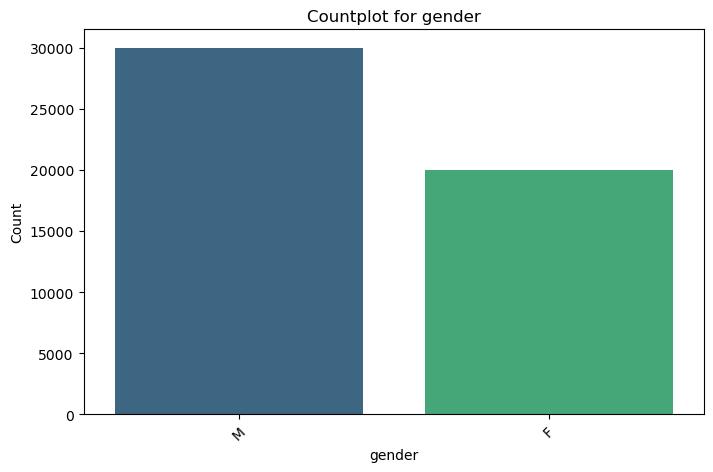

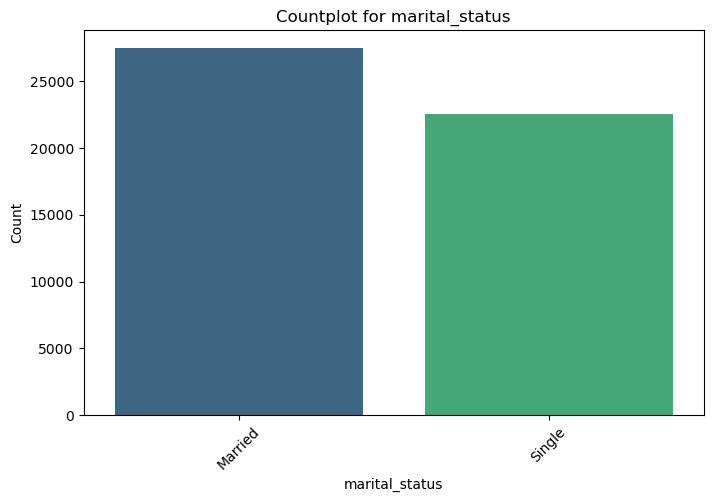

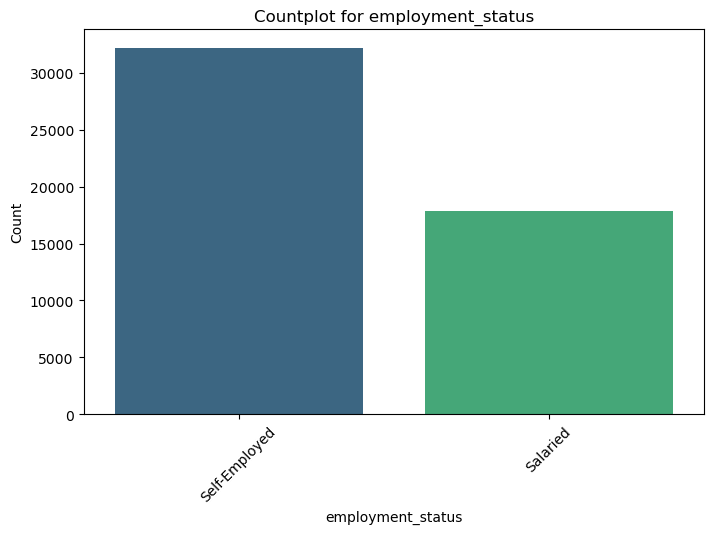

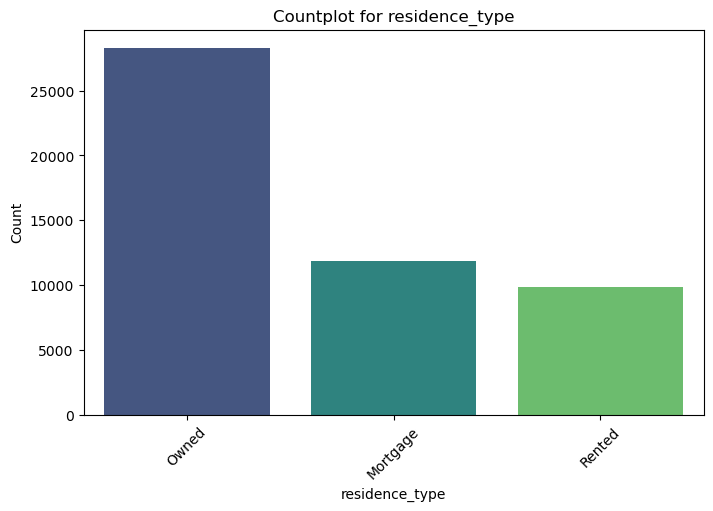

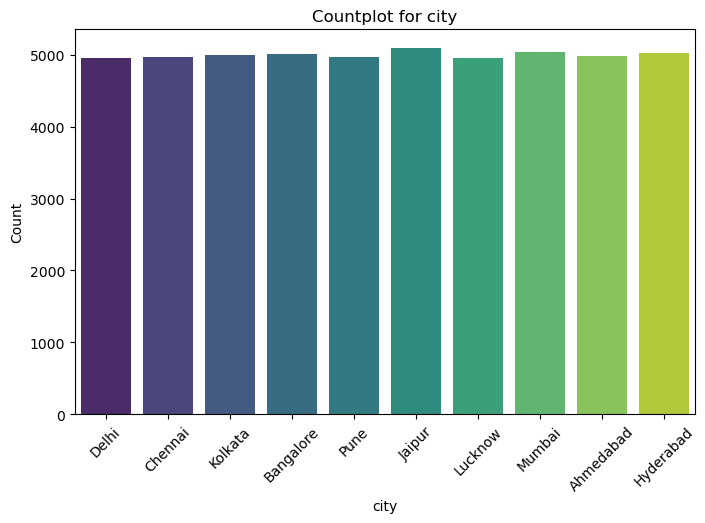

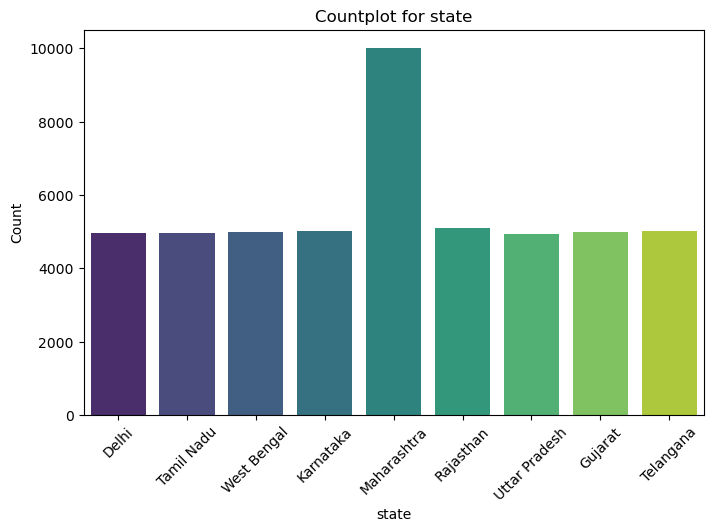

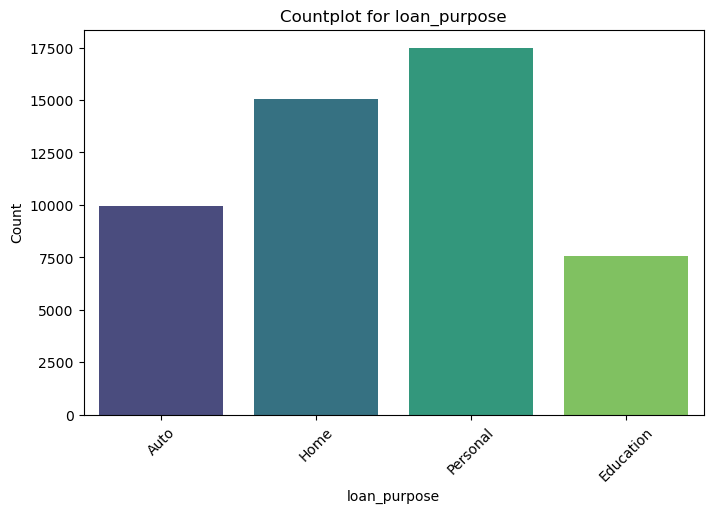

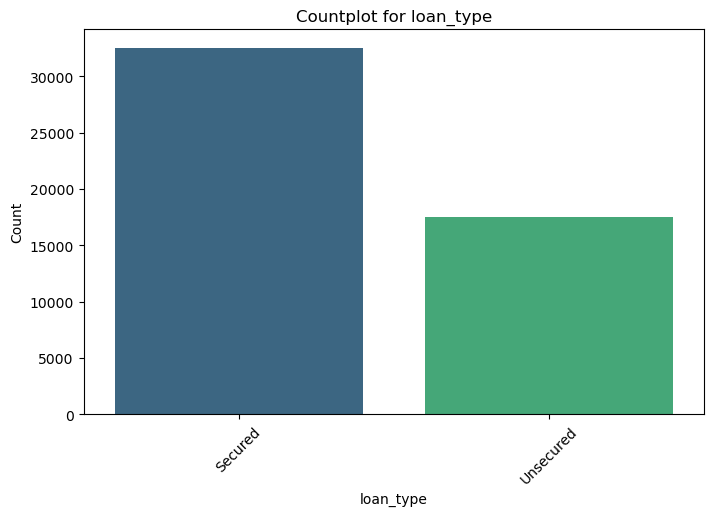

In [59]:
# univariate analysis for categorical columns

categorical_columns = df_m.select_dtypes(include='object').columns

# categorical_columns.remove('cust_id')
print(categorical_columns)

# Plot countplot for each categorical column
for column in categorical_columns:
    if column == 'cust_id' or column == 'loan_id' or column == 'disbursal_date' or column == 'installment_start_dt' : # skip id columns and date columns
        continue

    plt.figure(figsize=(8, 5))
    sns.countplot(x=df_m[column], palette='viridis')
    plt.title(f'Countplot for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.show()

In [213]:
# Bivariate analysis
# Categorical vs Categorical (Chi-square test, Contingency table)

import pandas as pd
from scipy.stats import chi2_contingency

# Assuming 'df' is your DataFrame
categorical_cols = df_m.select_dtypes(include=['object', 'category']).columns

# Loop over all pairs of categorical variables
dep_list = []
for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 != col2:
            contingency_table = pd.crosstab(df_m[col1], df_m[col2])
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            dep = 'no'
            if p < 0.05:
                dep = 'yes'
                dep_list.append(col1 + ' & ' + col2)

            print(f"Chi-square test between {col1} and {col2} -> p-value: {p} -> Dependant: {dep}")


# If the p-value is < 0.05, you can reject the null hypothesis and say that the two categorical variables are dependent.
print(dep_list)


Chi-square test between gender and marital_status -> p-value: 0.09339299500983009 -> Dependant: no
Chi-square test between gender and employment_status -> p-value: 0.39933952255397775 -> Dependant: no
Chi-square test between gender and residence_type -> p-value: 0.24532390331863657 -> Dependant: no
Chi-square test between gender and city -> p-value: 0.37053519388651973 -> Dependant: no
Chi-square test between gender and state -> p-value: 0.28673426134024727 -> Dependant: no
Chi-square test between gender and loan_purpose -> p-value: 0.5833729191176191 -> Dependant: no
Chi-square test between gender and loan_type -> p-value: 0.7456522681173203 -> Dependant: no
Chi-square test between marital_status and gender -> p-value: 0.09339299500983009 -> Dependant: no
Chi-square test between marital_status and employment_status -> p-value: 1.0862707827317439e-51 -> Dependant: yes
Chi-square test between marital_status and residence_type -> p-value: 7.251041180854349e-18 -> Dependant: yes
Chi-squar

In [ ]:
# Categorical vs Categorical (Stacked Bar Chart):

# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.countplot(x='categorical_col_1', hue='categorical_col_2', data=df_m)
# plt.show()

In [218]:
# Categorical vs Numerical (ANOVA test)

from scipy.stats import f_oneway

# Loop over categorical columns
dep_list = []
for cat_col in categorical_cols:
    for num_col in df_m.select_dtypes(include=['number']).columns:
        if df_m[cat_col].nunique() > 1:  # Make sure there are multiple categories
            groups = [df_m[df_m[cat_col] == category][num_col] for category in df_m[cat_col].unique()]
            f_stat, p_val = f_oneway(*groups)

            dep = 'no'
            if p_val < 0.05:
                dep = 'yes'
                dep_list.append(cat_col + ' & ' + num_col)
                
            print(f"ANOVA test between {cat_col} and {num_col} -> p-value: {p_val} -> Dependant: {dep}")

print(dep_list)

ANOVA test between gender and age -> p-value: 0.8779656992422873 -> Dependant: no
ANOVA test between gender and income -> p-value: 1.272028837740329e-107 -> Dependant: yes
ANOVA test between gender and number_of_dependants -> p-value: 0.04334839444517032 -> Dependant: yes
ANOVA test between gender and years_at_current_address -> p-value: 0.9910232712297888 -> Dependant: no
ANOVA test between gender and zipcode -> p-value: 0.08776769550609045 -> Dependant: no
ANOVA test between gender and number_of_open_accounts -> p-value: 0.9785096261822621 -> Dependant: no
ANOVA test between gender and number_of_closed_accounts -> p-value: 0.058430914650893555 -> Dependant: no
ANOVA test between gender and total_loan_months -> p-value: 0.7300764050932897 -> Dependant: no
ANOVA test between gender and delinquent_months -> p-value: 0.6139331468024944 -> Dependant: no
ANOVA test between gender and enquiry_count -> p-value: 0.7593559224059078 -> Dependant: no
ANOVA test between gender and credit_utilizat

/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


ANOVA test between city and number_of_closed_accounts -> p-value: 0.2971556050528217 -> Dependant: no
ANOVA test between city and total_loan_months -> p-value: 0.5150636358350573 -> Dependant: no
ANOVA test between city and delinquent_months -> p-value: 0.3003669027740535 -> Dependant: no
ANOVA test between city and enquiry_count -> p-value: 0.3280320344333069 -> Dependant: no
ANOVA test between city and credit_utilization_ratio -> p-value: 0.19979390376624206 -> Dependant: no
ANOVA test between city and loan_amount -> p-value: 0.9378569314309703 -> Dependant: no
ANOVA test between city and loan_tenure_months -> p-value: 0.8231839246561428 -> Dependant: no
ANOVA test between city and principal_outstanding -> p-value: 0.3459306304287646 -> Dependant: no
ANOVA test between city and bank_balance_at_application -> p-value: 0.3372906418722411 -> Dependant: no
ANOVA test between city and default -> p-value: 0.7903680995043927 -> Dependant: no
ANOVA test between city and LTI -> p-value: 0.785

In [ ]:
# Categorical vs Numerical (Boxplot):

# sns.boxplot(x='categorical_col', y='numerical_col', data=df_m)
# plt.show()

In [ ]:
# Numerical vs Numerical (Correlation)

numerical_cols = df_m.select_dtypes(include=['number']).columns
for col1 in numerical_cols:
    for col2 in numerical_cols:
        if col1 != col2:
            correlation = df_m[col1].corr(df_m[col2])

            

            print(f"Correlation between {col1} and {col2}: {correlation}")


Correlation between age and income: 0.036504012887236134
Correlation between age and number_of_dependants: 0.25424577670857046
Correlation between age and years_at_current_address: 0.00021000077946914245
Correlation between age and zipcode: -0.00024006921370923977
Correlation between age and number_of_open_accounts: -0.0009900545403230595
Correlation between age and number_of_closed_accounts: 0.005772159940185803
Correlation between age and total_loan_months: -0.0014777275467143258
Correlation between age and delinquent_months: -0.0026254607178474603
Correlation between age and enquiry_count: 0.000444094504678666
Correlation between age and credit_utilization_ratio: 0.0043130095998046535
Correlation between age and loan_amount: -0.052394264383805844
Correlation between age and loan_tenure_months: 0.0018784654642503432
Correlation between age and principal_outstanding: 0.08869911053405659
Correlation between age and bank_balance_at_application: 0.030185946981117703
Correlation between a

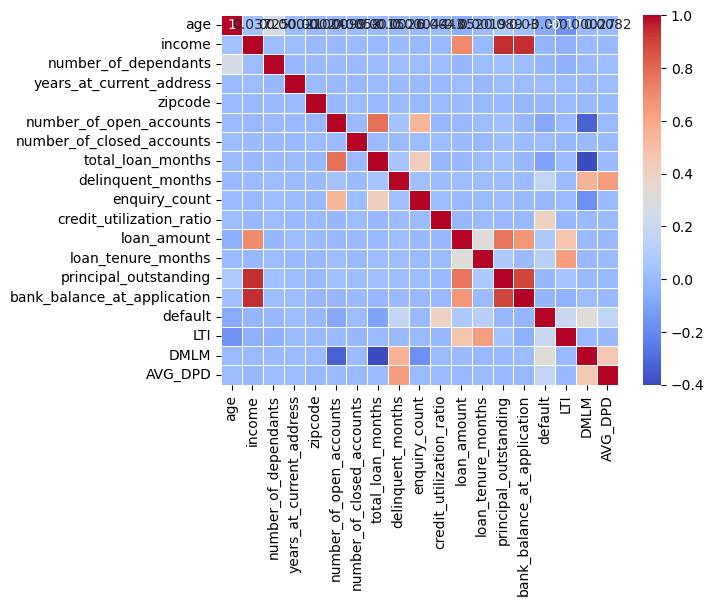

In [220]:
import seaborn as sns

corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.show()

#### Interpretation of Specific Correlations

Positive Correlations:

Age and Income: As age increases, income tends to increase as well.

Loan Amount and Principal Outstanding: A larger loan amount typically results in a higher principal outstanding.

Credit Utilization Ratio and Default: Higher credit utilization ratios are associated with a higher risk of default.

Negative Correlations:

Number of Open Accounts and Default: Having a higher number of open accounts might be associated with a lower risk of default.

Loan Tenure Months and Default: Longer loan tenures might be associated with a lower risk of default.

Other Observations:

Strongest Correlations: The darkest shades of red and blue indicate the strongest correlations. For example, there's a strong positive correlation between loan amount and principal outstanding.

Weak Correlations: Lighter shades suggest weaker relationships between variables. For instance, the correlation between age and default seems to be weak.

In [69]:
# Convert boolean to numeric
df_m['default'] = df_m['default'].astype(int)

## Feature Engineering

In [114]:
# create Loan-to-Income (LTI) column
import numpy as np

df_m['LTI'] = np.where(df_m['income'] == 0, 0, round(df_m['loan_amount'] / df_m['income'], 2))

Correlation between LTI and default: 0.20284675766040045


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

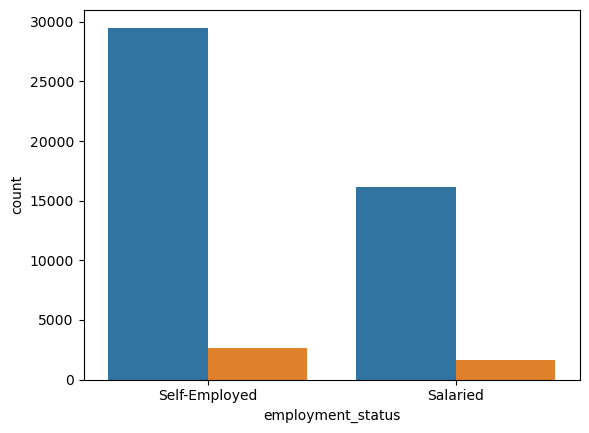

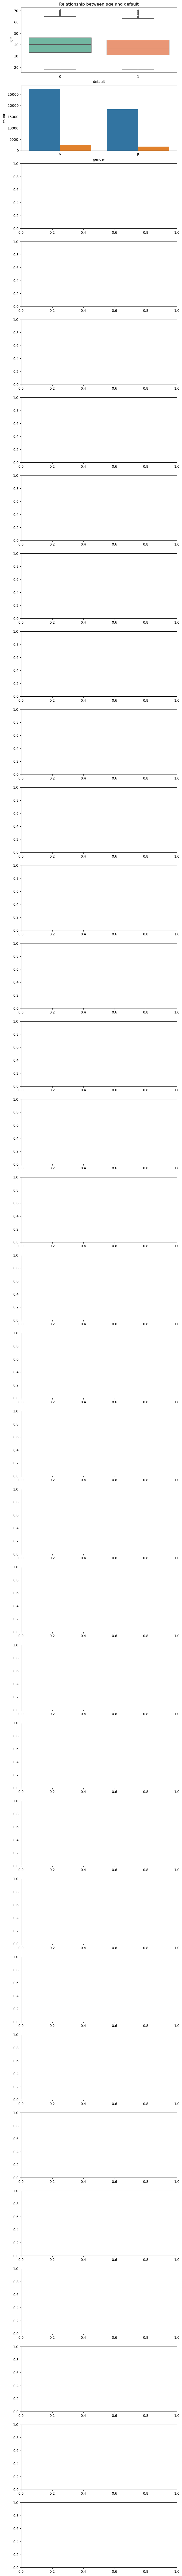

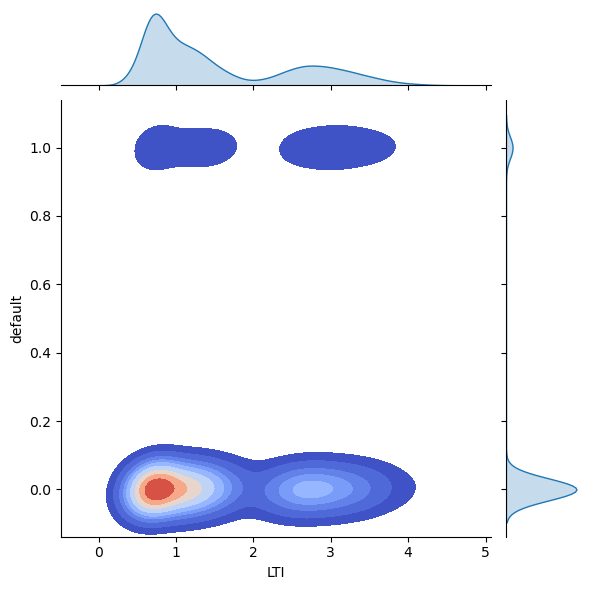

In [115]:
# visualize LTI influnce
correlation = df_m['LTI'].corr(df_m['default'])
print(f"Correlation between LTI and default: {correlation}")

# Plot KDE for smooth comparison
sns.jointplot(x='LTI', y='default', data=df_m, kind='kde', fill=True, cmap='coolwarm', marginal_kws={'fill': True})
plt.show()

In [116]:
# create Delinquent months to Loan Months (DMLM) column

df_m['DMLM'] = np.where(df_m['total_loan_months'] == 0, 0, round((df_m['delinquent_months'] / df_m['total_loan_months']) * 100, 1))

Correlation between DMLM and default: 0.31103186595366145


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

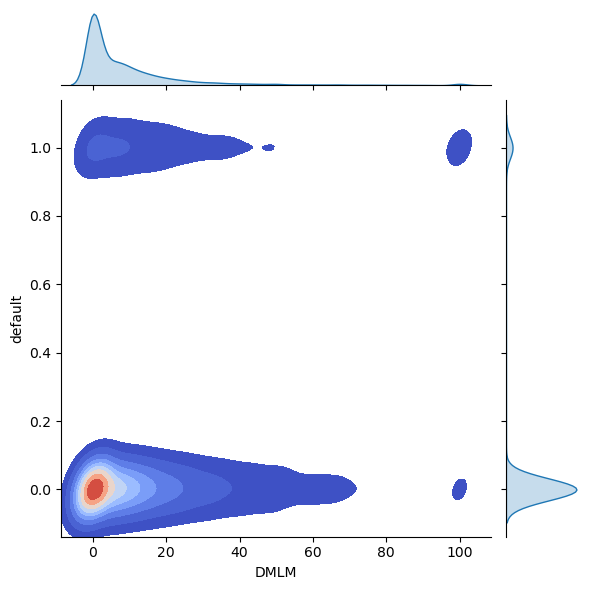

In [117]:
# visualize DMLM influnce
correlation = df_m['DMLM'].corr(df_m['default'])
print(f"Correlation between DMLM and default: {correlation}")

# Plot KDE for smooth comparison
sns.jointplot(x='DMLM', y='default', data=df_m, kind='kde', fill=True, cmap='coolwarm', marginal_kws={'fill': True})
plt.show()

In [ ]:
# create Average days past due (DPD) per delinquent month column
df_m['AVG_DPD'] = np.where(df_m['delinquent_months'] == 0, 0, round((df_m['total_dpd'] / df_m['delinquent_months']) * 100, 1))

In [118]:
df_m.head()

,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,...,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default,LTI,DMLM,AVG_DPD
0,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,...,1973600,33,1630408,873386,2019-07-24,2019-08-10,0,0.95,0.0,0.0
1,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,...,3106400,30,709309,464100,2019-07-24,2019-08-15,0,3.22,12.5,500.0
2,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,...,1736000,21,1562399,1476042,2019-07-24,2019-08-21,0,0.75,29.3,612.5
3,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,Karnataka,...,1397600,6,1257839,1031094,2019-07-24,2019-08-09,0,0.49,13.0,580.0
4,37,M,Married,Salaried,3432000,3,Owned,28,Pune,Maharashtra,...,3616000,28,1772334,1032458,2019-07-24,2019-08-02,0,1.32,0.0,0.0


Correlation between AVG_DPD and default: 0.1588769771595809


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

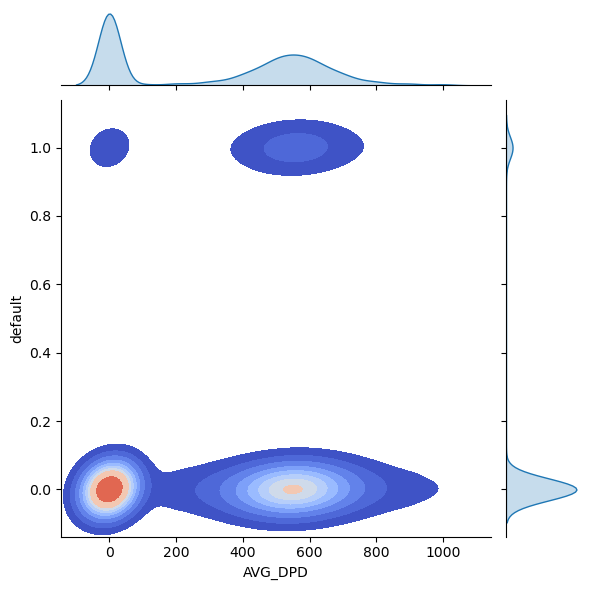

In [84]:
# visualize AVG_DPD influnce
correlation = df_m['AVG_DPD'].corr(df_m['default'])
print(f"Correlation between AVG_DPD and default: {correlation}")

# Plot KDE for smooth comparison
sns.jointplot(x='AVG_DPD', y='default', data=df_m, kind='kde', fill=True, cmap='coolwarm', marginal_kws={'fill': True})
plt.show()

In [87]:
# drop id fields
df_m = df_m.drop(['cust_id', 'loan_id'], axis=1)
df_m.head()

,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,...,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default,LTI,DMLM,DPD,AVG_DPD
0,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,...,33,1630408,873386,2019-07-24,2019-08-10,0,0.95,0.0,0.0,0.0
1,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,...,30,709309,464100,2019-07-24,2019-08-15,0,3.22,12.5,500.0,500.0
2,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,...,21,1562399,1476042,2019-07-24,2019-08-21,0,0.75,29.3,612.5,612.5
3,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,Karnataka,...,6,1257839,1031094,2019-07-24,2019-08-09,0,0.49,13.0,580.0,580.0
4,37,M,Married,Salaried,3432000,3,Owned,28,Pune,Maharashtra,...,28,1772334,1032458,2019-07-24,2019-08-02,0,1.32,0.0,0.0,0.0


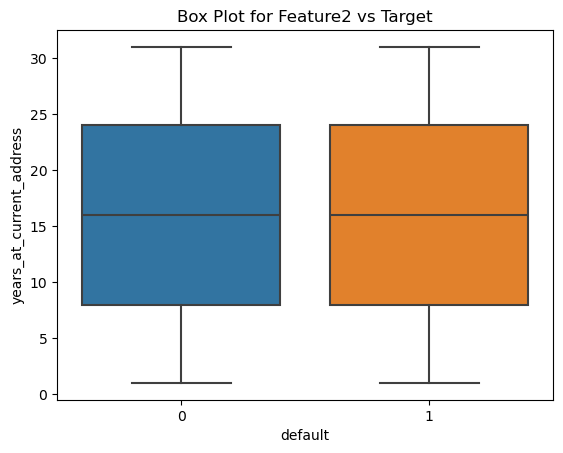

In [90]:
sns.boxplot(x='default', y='years_at_current_address', data=df_m)
plt.title('Box Plot for Feature2 vs Target')
plt.show()

In [128]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


def calculate_vif(df, exclude_columns=None):
    """
    Calculate Variance Inflation Factor (VIF) for each feature in the dataset.
    
    Parameters:
    df (pd.DataFrame): The input dataframe with features.
    exclude_columns (list): List of columns to exclude from the VIF calculation (default is None).
    
    Returns:
    pd.DataFrame: DataFrame containing the VIF for each feature.
    """
    # Step 1: Select numeric columns and exclude specified columns
    if exclude_columns is None:
        exclude_columns = []
    
    # Filter out the numeric columns and exclude the specified ones
    numeric_cols = df.select_dtypes(include=[np.number]).drop(columns=exclude_columns).columns 
    
    # Step 2: Prepare X data (features) excluding the target
    X = df[numeric_cols]
    
    # Step 3: Add a constant (intercept) to the model
    X = sm.add_constant(X)
    
    # Step 4: Calculate VIF for each feature
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    # Step 5: Return VIF values
    return vif_data

# Example usage
# Call the function on your dataframe, excluding the 'default' column (for example)
vif_result = calculate_vif(df_m, exclude_columns=['default'])
print(vif_result)

                        Feature        VIF
0                         const  50.297360
1                           age   1.170462
2                        income  18.465048
3          number_of_dependants   1.069590
4      years_at_current_address   1.000318
5                       zipcode   1.000280
6       number_of_open_accounts   2.959639
7     number_of_closed_accounts   1.003404
8             total_loan_months   2.859107
9             delinquent_months  29.065669
10                    total_dpd  30.783656
11                enquiry_count   1.414454
12     credit_utilization_ratio   1.000604
13                  loan_amount   4.623114
14           loan_tenure_months   1.728577
15        principal_outstanding  12.449843
16  bank_balance_at_application   9.187262
17                          LTI   2.806376
18                         DMLM   2.032181
19                      AVG_DPD   1.964442


#### Note: A VIF of infinity (inf) indicates perfect multicollinearity. gst, processing_fee, net_disbursement are calculated from loan_amount with fix formula. Since these are directly dependent on loan_amount, we can remove these. This should resolve the "inf" VIF.

In [ ]:
# drop gst, processing_fee, net_disbursement features
df_m = df_m.drop(['net_disbursement','gst','processing_fee'], axis=1)
df_m.head()


,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,...,loan_amount,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default,LTI,DMLM,AVG_DPD
0,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,...,2467000,33,1630408,873386,2019-07-24,2019-08-10,0,0.95,0.0,0.0
1,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,...,3883000,30,709309,464100,2019-07-24,2019-08-15,0,3.22,12.5,500.0
2,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,...,2170000,21,1562399,1476042,2019-07-24,2019-08-21,0,0.75,29.3,612.5
3,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,Karnataka,...,1747000,6,1257839,1031094,2019-07-24,2019-08-09,0,0.49,13.0,580.0
4,37,M,Married,Salaried,3432000,3,Owned,28,Pune,Maharashtra,...,4520000,28,1772334,1032458,2019-07-24,2019-08-02,0,1.32,0.0,0.0


In [ ]:
# Again see the VIF scores after removing gst, processing_fee, net_disbursement features

vif_result = calculate_vif(df_m, exclude_columns=['default'])
print(vif_result)

                        Feature        VIF
0                         const  50.310165
1                           age   1.172788
2                        income  18.465761
3          number_of_dependants   1.069596
4      years_at_current_address   1.000380
5                       zipcode   1.000280
6       number_of_open_accounts   2.959691
7     number_of_closed_accounts   1.003425
8             total_loan_months   2.859114
9             delinquent_months  29.065687
10                    total_dpd  30.783707
11                enquiry_count   1.414454
12     credit_utilization_ratio   1.000605
13              sanction_amount  65.580884
14                  loan_amount  66.992762
15           loan_tenure_months   1.748520
16        principal_outstanding  12.475458
17  bank_balance_at_application   9.187278
18                          LTI   2.819043
19                         DMLM   2.032245
20                      AVG_DPD   1.964625


#### Note: As there are still high VIF scores amoung sanction_amount and loan_amount we will remove sanction_amount as it seems the actual disbursed loan amount (loan_amount) is more critical for our analysis. Also loan_amount was used to calculated other removed features, so we should keep it

In [127]:
# drop sanction_amount feature
df_m = df_m.drop(['sanction_amount'], axis=1)
df_m.head()

,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,...,loan_amount,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default,LTI,DMLM,AVG_DPD
0,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,...,2467000,33,1630408,873386,2019-07-24,2019-08-10,0,0.95,0.0,0.0
1,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,...,3883000,30,709309,464100,2019-07-24,2019-08-15,0,3.22,12.5,500.0
2,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,...,2170000,21,1562399,1476042,2019-07-24,2019-08-21,0,0.75,29.3,612.5
3,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,Karnataka,...,1747000,6,1257839,1031094,2019-07-24,2019-08-09,0,0.49,13.0,580.0
4,37,M,Married,Salaried,3432000,3,Owned,28,Pune,Maharashtra,...,4520000,28,1772334,1032458,2019-07-24,2019-08-02,0,1.32,0.0,0.0


In [ ]:
# Again see the VIF scores after removing sanction_amount feature

vif_result = calculate_vif(df_m, exclude_columns=['default'])
print(vif_result)

                        Feature        VIF
0                         const  50.232255
1                           age   1.170462
2                        income  18.464910
3          number_of_dependants   1.069585
4      years_at_current_address   1.000314
5                       zipcode   1.000277
6       number_of_open_accounts   2.959561
7     number_of_closed_accounts   1.003397
8             total_loan_months   2.858774
9             delinquent_months   2.149109
10                enquiry_count   1.414443
11     credit_utilization_ratio   1.000566
12                  loan_amount   4.622992
13           loan_tenure_months   1.728571
14        principal_outstanding  12.449349
15  bank_balance_at_application   9.186065
16                          LTI   2.806374
17                         DMLM   2.021934
18                      AVG_DPD   1.719695


#### Note: delinquent_months and total_dpd have very high VIFs, suggesting that they are highly correlated with one another or with other features in your dataset. These variables likely convey overlapping information, which can lead to redundancy. So removing total_dpd as we have calculated another feature AVG_DPD using these two features

In [139]:
# drop sanction_amount feature
df_m = df_m.drop(['total_dpd'], axis=1)
df_m.head()

KeyError: "['total_dpd'] not found in axis"

In [146]:
# Again see the VIF scores after removing v feature

vif_result = calculate_vif(df_m, exclude_columns=['default'])
print(vif_result)

                        Feature        VIF
0                         const  50.232255
1                           age   1.170462
2                        income  18.464910
3          number_of_dependants   1.069585
4      years_at_current_address   1.000314
5                       zipcode   1.000277
6       number_of_open_accounts   2.959561
7     number_of_closed_accounts   1.003397
8             total_loan_months   2.858774
9             delinquent_months   2.149109
10                enquiry_count   1.414443
11     credit_utilization_ratio   1.000566
12                  loan_amount   4.622992
13           loan_tenure_months   1.728571
14        principal_outstanding  12.449349
15  bank_balance_at_application   9.186065
16                          LTI   2.806374
17                         DMLM   2.021934
18                      AVG_DPD   1.719695


In [147]:
df_m.head()

,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,...,loan_amount,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default,LTI,DMLM,AVG_DPD
0,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,...,2467000,33,1630408,873386,2019-07-24,2019-08-10,0,0.95,0.0,0.0
1,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,...,3883000,30,709309,464100,2019-07-24,2019-08-15,0,3.22,12.5,500.0
2,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,...,2170000,21,1562399,1476042,2019-07-24,2019-08-21,0,0.75,29.3,612.5
3,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,Karnataka,...,1747000,6,1257839,1031094,2019-07-24,2019-08-09,0,0.49,13.0,580.0
4,37,M,Married,Salaried,3432000,3,Owned,28,Pune,Maharashtra,...,4520000,28,1772334,1032458,2019-07-24,2019-08-02,0,1.32,0.0,0.0


In [ ]:
# removing date features as those will not help the model much

# drop disbursal_date, installment_start_dt features
df_wodt = df_m.drop(['disbursal_date','installment_start_dt'], axis=1)
df_wodt.head()


,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,...,loan_purpose,loan_type,loan_amount,loan_tenure_months,principal_outstanding,bank_balance_at_application,default,LTI,DMLM,AVG_DPD
0,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,...,Auto,Secured,2467000,33,1630408,873386,0,0.95,0.0,0.0
1,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,...,Home,Secured,3883000,30,709309,464100,0,3.22,12.5,500.0
2,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,...,Personal,Unsecured,2170000,21,1562399,1476042,0,0.75,29.3,612.5
3,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,Karnataka,...,Personal,Unsecured,1747000,6,1257839,1031094,0,0.49,13.0,580.0
4,37,M,Married,Salaried,3432000,3,Owned,28,Pune,Maharashtra,...,Auto,Secured,4520000,28,1772334,1032458,0,1.32,0.0,0.0


In [168]:
# Select features using IV score

import scorecardpy as sc

# Load data (assuming df_m is the DataFrame)
df = df_wodt.copy()
df['default'] = df['default'].astype(bool)

# 'default' is the target and others are features
y = 'default'
X = df.drop(columns=[y])

# Calculate IV using scorecardpy
iv_df = sc.iv(df, y)

# Display the IV scores
print(iv_df)

                       variable  info_value
9      credit_utilization_ratio    2.518803
1                          DMLM    0.959500
18                  loan_amount    0.847740
24                       income    0.777416
21                          LTI    0.597583
25                      AVG_DPD    0.597083
22            delinquent_months    0.443545
20                 loan_purpose    0.384857
17        principal_outstanding    0.319822
11           loan_tenure_months    0.273169
7             total_loan_months    0.268500
8                residence_type    0.247054
4                     loan_type    0.167833
3                           age    0.086525
15      number_of_open_accounts    0.083266
6   bank_balance_at_application    0.012110
16                enquiry_count    0.007672
23     years_at_current_address    0.006343
0          number_of_dependants    0.003496
10            employment_status    0.002949
19               marital_status    0.001933
14                      zipcode 

In [169]:
# Filter features with IV >= 0.2
selected_features = iv_df[iv_df['info_value'] >= 0.2]

print(selected_features)

                    variable  info_value
9   credit_utilization_ratio    2.518803
1                       DMLM    0.959500
18               loan_amount    0.847740
24                    income    0.777416
21                       LTI    0.597583
25                   AVG_DPD    0.597083
22         delinquent_months    0.443545
20              loan_purpose    0.384857
17     principal_outstanding    0.319822
11        loan_tenure_months    0.273169
7          total_loan_months    0.268500
8             residence_type    0.247054


In [177]:
# dataset split

from sklearn.model_selection import train_test_split

X_selected = df[selected_features.variable]  # Features with IV >= 0.2
y = df['default']  # Target variable

# Split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Test target shape:", y_test.shape)


Training data shape: (40000, 12)
Test data shape: (10000, 12)
Training target shape: (40000,)
Test target shape: (10000,)


In [178]:
X_train.head()

,credit_utilization_ratio,DMLM,loan_amount,income,LTI,AVG_DPD,delinquent_months,loan_purpose,principal_outstanding,loan_tenure_months,total_loan_months,residence_type
39087,92,0.0,687000,779000,0.88,0.0,0,Personal,488968,21,131,Owned
30893,53,12.8,10274000,2963000,3.47,700.0,11,Home,1663436,30,86,Mortgage
45278,5,1.5,16145000,5629000,2.87,500.0,1,Home,2978889,29,66,Owned
16398,16,0.0,2762000,4229000,0.65,0.0,0,Personal,1988639,17,32,Rented
13653,11,5.0,652000,378000,1.72,657.1,7,Education,211590,37,141,Owned


In [205]:
# Encoding categorical features after splitting

# Identify Categorical Columns
categorical_columns = X_selected.select_dtypes(include=['object', 'category']).columns

# Apply One-Hot Encoding to the categorical columns 'loan_purpose' and 'residence_type'
X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True, dtype=int)

# Apply the same One-Hot Encoding to the test set
X_test_encoded = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True, dtype=int)

# Make sure both train and test have the same columns (in case some categories are missing in one)
# We align the columns between training and test set
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)


In [206]:
X_train_encoded.head()

,credit_utilization_ratio,DMLM,loan_amount,income,LTI,AVG_DPD,delinquent_months,principal_outstanding,loan_tenure_months,total_loan_months,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,residence_type_Owned,residence_type_Rented
39087,92,0.0,687000,779000,0.88,0.0,0,488968,21,131,0,0,1,1,0
30893,53,12.8,10274000,2963000,3.47,700.0,11,1663436,30,86,0,1,0,0,0
45278,5,1.5,16145000,5629000,2.87,500.0,1,2978889,29,66,0,1,0,1,0
16398,16,0.0,2762000,4229000,0.65,0.0,0,1988639,17,32,0,0,1,0,1
13653,11,5.0,652000,378000,1.72,657.1,7,211590,37,141,1,0,0,1,0


In [ ]:
# the Min-Max Scaler
from sklearn.preprocessing import MinMaxScaler

# Identify the numeric columns (features to be scaled)
numeric_columns = X_train_encoded.select_dtypes(include=['float64', 'int64']).columns

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data
X_train_scaled = X_train_encoded.copy()
X_train_scaled[numeric_columns] = scaler.fit_transform(X_train_encoded[numeric_columns])

# Apply the same scaling to the test data
X_test_scaled = X_test_encoded.copy()
X_test_scaled[numeric_columns] = scaler.transform(X_test_encoded[numeric_columns])


In [225]:
X_train_scaled.head()

,credit_utilization_ratio,DMLM,loan_amount,income,LTI,AVG_DPD,delinquent_months,principal_outstanding,loan_tenure_months,total_loan_months,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,residence_type_Owned,residence_type_Rented
39087,0.929293,0.000,0.014367,0.064922,0.192560,0.0000,0.000000,0.097794,0.283019,0.585586,0.0,0.0,1.0,1.0,0.0
30893,0.535354,0.128,0.214852,0.246937,0.759300,0.7000,0.458333,0.332687,0.452830,0.382883,0.0,1.0,0.0,0.0,0.0
45278,0.050505,0.015,0.337627,0.469122,0.628009,0.5000,0.041667,0.595778,0.433962,0.292793,0.0,1.0,0.0,1.0,0.0
16398,0.161616,0.000,0.057759,0.352446,0.142232,0.0000,0.000000,0.397728,0.207547,0.139640,0.0,0.0,1.0,0.0,1.0
13653,0.111111,0.050,0.013635,0.031503,0.376368,0.6571,0.291667,0.042318,0.584906,0.630631,1.0,0.0,0.0,1.0,0.0


#### Model Training & Evaluation

In [210]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Create the Logistic Regression model
log_reg = LogisticRegression(solver='saga', max_iter=1000, C=1.0)

# Train the model using the training data
log_reg.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = log_reg.predict(X_test_scaled)

# Evaluate the model performance
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification report for detailed evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix for better understanding of misclassifications
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9627
Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.99      0.98      9139
        True       0.82      0.72      0.77       861

    accuracy                           0.96     10000
   macro avg       0.90      0.85      0.87     10000
weighted avg       0.96      0.96      0.96     10000

Confusion Matrix:
[[9007  132]
 [ 241  620]]


In [ ]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


# Feature Importances (optional)
# feature_importances = rf_model.feature_importances_
# features = X.columns

# importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
# importances_df = importances_df.sort_values(by='Importance', ascending=False)

# print("\nFeature Importances:")
# print(importances_df)


Accuracy: 0.9640

Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.99      0.98      9139
        True       0.85      0.71      0.77       861

    accuracy                           0.96     10000
   macro avg       0.91      0.85      0.88     10000
weighted avg       0.96      0.96      0.96     10000


Confusion Matrix:
[[9028  111]
 [ 249  612]]


In [224]:
# XGBooost model
import xgboost as xgb

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    objective='binary:logistic',  # For binary classification
    random_state=42
)
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importances (optional)
# importances = xgb_model.feature_importances_
# importances_df = pd.DataFrame({
#     'Feature': X.columns,
#     'Importance': importances
# })
# importances_df = importances_df.sort_values(by='Importance', ascending=False)

# print("\nFeature Importances:")
# print(importances_df)

Accuracy: 0.9642

Classification Report:
              precision    recall  f1-score   support

       False       0.98      0.98      0.98      9139
        True       0.82      0.74      0.78       861

    accuracy                           0.96     10000
   macro avg       0.90      0.86      0.88     10000
weighted avg       0.96      0.96      0.96     10000


Confusion Matrix:
[[9001  138]
 [ 220  641]]


#### As XgBoost is showing slightly better recall measurement and all models showed same accuracy then we can move further with this model. There might be room for improvement in detecting True instances, as Recall for the positive class is lower (74%) compared to Precision (82%). This indicates that the model is missing some of the positive cases (false negatives).

In [229]:
# RandomizedSearchCV for XGBoost 

from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_classification
from scipy.stats import randint, uniform

# Define the XGBoost model without 'use_label_encoder'
model = xgb.XGBClassifier(eval_metric='logloss')

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 1000),  # Number of boosting rounds
    'max_depth': randint(3, 15),  # Maximum depth of a tree
    'learning_rate': uniform(0.01, 0.2),  # Step size at each iteration
    'subsample': uniform(0.5, 1),  # Fraction of samples to use for each boosting round
    'colsample_bytree': uniform(0.5, 1)  # Fraction of features to use
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=100,
    scoring='accuracy',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

# Fit the model
random_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Cross-validation Score: {random_search.best_score_}")

# Evaluate on the test set
test_score = random_search.score(X_test_scaled, y_test)
print(f"Test Set Score: {test_score}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END colsample_bytree=0.8745401188473625, learning_rate=0.20014286128198325, max_depth=13, n_estimators=171, subsample=1.0986584841970366; total time=   0.2s
[CV] END colsample_bytree=0.8745401188473625, learning_rate=0.20014286128198325, max_depth=13, n_estimators=171, subsample=1.0986584841970366; total time=   0.2s
[CV] END colsample_bytree=0.8745401188473625, learning_rate=0.20014286128198325, max_depth=13, n_estimators=171, subsample=1.0986584841970366; total time=   0.2s
[CV] END colsample_bytree=0.8745401188473625, learning_rate=0.20014286128198325, max_depth=13, n_estimators=171, subsample=1.0986584841970366; total time=   0.1s
[CV] END colsample_bytree=0.8745401188473625, learning_rate=0.20014286128198325, max_depth=13, n_estimators=171, subsample=1.0986584841970366; total time=   0.1s
[CV] END colsample_bytree=0.6560186404424365, learning_rate=0.041198904067240534, max_depth=13, n_estimators=558, subsample=1.3

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
360 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py", line 1531, in fit
    self._Booster = train(
                    ^^^^^^
  File "/opt/anacon

Best Parameters: {'colsample_bytree': 0.7739611273211338, 'learning_rate': 0.05291782394167483, 'max_depth': 4, 'n_estimators': 352, 'subsample': 0.5944429607559284}
Best Cross-validation Score: 0.9648
Test Set Score: 0.9649


In [ ]:
# Best Parameters: {'colsample_bytree': 0.7739611273211338, 'learning_rate': 0.05291782394167483, 'max_depth': 4, 'n_estimators': 352, 'subsample': 0.5944429607559284}
# Best Cross-validation Score: 0.9648
# Test Set Score: 0.9649


# Access the best parameters from the RandomizedSearchCV
best_params = random_search.best_params_

# Now use the best parameters to train a new XGBoost model
best_model = xgb.XGBClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    eval_metric='logloss'  # Keeping the evaluation metric consistent
)

# Fit the model with the training data
best_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9642

Classification Report:
              precision    recall  f1-score   support

       False       0.98      0.98      0.98      9139
        True       0.82      0.74      0.78       861

    accuracy                           0.96     10000
   macro avg       0.90      0.86      0.88     10000
weighted avg       0.96      0.96      0.96     10000


Confusion Matrix:
[[9001  138]
 [ 220  641]]


In [ ]:
# Class Imbalance with Undersampling

from imblearn.under_sampling import RandomUnderSampler

# Print the class distribution before undersampling
print(f"Original class distribution: {dict(zip(*np.unique(y_train, return_counts=True)))}")

# Initialize the RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Apply the undersampler to the training data
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_scaled, y_train)

# Print the class distribution after undersampling
print(f"Resampled class distribution: {dict(zip(*np.unique(y_train_resampled, return_counts=True)))}")

# Train an XGBoost model with the resampled data
model = xgb.XGBClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    eval_metric='logloss'  # Keeping the evaluation metric consistent
)
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Original class distribution: {False: 36564, True: 3436}
Resampled class distribution: {False: 3436, True: 3436}
Accuracy: 0.9341

Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.93      0.96      9139
        True       0.57      0.96      0.72       861

    accuracy                           0.93     10000
   macro avg       0.78      0.95      0.84     10000
weighted avg       0.96      0.93      0.94     10000


Confusion Matrix:
[[8513  626]
 [  33  828]]


##### Using undersampling recall has increased to 96% but precision is reduced to 57% from 82% and f1-score to 72% from 78%, accuracy become 93% from 96%

In [ ]:
# Class Imbalance with Oversampling

from imblearn.over_sampling import SMOTE


# Print the class distribution before oversampling
print(f"Original class distribution: {dict(zip(*np.unique(y_train, return_counts=True)))}")

# Initialize the SMOTE object
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Print the class distribution after oversampling
print(f"Resampled class distribution: {dict(zip(*np.unique(y_train_resampled, return_counts=True)))}")

# Train an XGBoost model with the resampled data
model = xgb.XGBClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    eval_metric='logloss'  # Keeping the evaluation metric consistent
)
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))




Original class distribution: {False: 36564, True: 3436}
Resampled class distribution: {False: 36564, True: 36564}
Accuracy: 0.9525

Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.96      0.97      9139
        True       0.66      0.91      0.77       861

    accuracy                           0.95     10000
   macro avg       0.83      0.93      0.87     10000
weighted avg       0.96      0.95      0.96     10000


Confusion Matrix:
[[8739  400]
 [  75  786]]


##### Using overampling recall has increased to 91% but precision is reduced to 66% from 82% and f1-score to 77% from 78%, accuracy become 95% from 96%

In [ ]:
# Advanced Hyperparameter Tuning with Optuna

import optuna
from sklearn.model_selection import cross_val_score

# Define objective function for Optuna
def objective(trial):
    # Define hyperparameter search space
    param = {
        'objective': 'binary:logistic',  # For binary classification
        'eval_metric': 'logloss',
        'max_depth': trial.suggest_int('max_depth', 3, 10),  # Search space for max_depth
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, step=0.01),  # Search space for learning_rate
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),  # Search space for n_estimators
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),  # Fraction of samples for training
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),  # Fraction of features for each tree
        'gamma': trial.suggest_float('gamma', 0, 5),  # Regularization parameter
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10)  # Minimum sum of instance weight (hessian) in a child
    }
    
    # Initialize XGBoost model with the suggested hyperparameters
    model = xgb.XGBClassifier(**param)
    
    # Cross-validation to evaluate the model
    score = cross_val_score(model, X_train_scaled, y_train, cv=3, scoring='accuracy').mean()
    
    return score  # We want to maximize accuracy

# Create Optuna study object
study = optuna.create_study(direction='maximize')  # We want to maximize accuracy
study.optimize(objective, n_trials=100)  # Perform the optimization for 100 trials

# Get the best parameters found by Optuna
best_params = study.best_params
print(f"Best parameters: {best_params}")

# Train the final model with the best hyperparameters
final_model = xgb.XGBClassifier(**best_params)
final_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = final_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


# Best parameters: {'max_depth': 9, 'learning_rate': 0.15000000000000002, 'n_estimators': 421, 'subsample': 0.6514078421914806, 'colsample_bytree': 0.9106317681948494, 'gamma': 4.245156220474618, 'min_child_weight': 10}


[I 2025-01-08 15:13:59,278] A new study created in memory with name: no-name-b579720c-c270-4424-8e01-28ab09d093ea
[I 2025-01-08 15:14:01,820] Trial 0 finished with value: 0.9640000187045324 and parameters: {'max_depth': 8, 'learning_rate': 0.22, 'n_estimators': 478, 'subsample': 0.698248313874574, 'colsample_bytree': 0.7485647426168274, 'gamma': 3.2004945123361805, 'min_child_weight': 8}. Best is trial 0 with value: 0.9640000187045324.
[I 2025-01-08 15:14:04,596] Trial 1 finished with value: 0.9640500049549386 and parameters: {'max_depth': 6, 'learning_rate': 0.02, 'n_estimators': 248, 'subsample': 0.6970893131573097, 'colsample_bytree': 0.9948988590200302, 'gamma': 2.2293871809420356, 'min_child_weight': 1}. Best is trial 1 with value: 0.9640500049549386.
[I 2025-01-08 15:14:06,257] Trial 2 finished with value: 0.9644750362046887 and parameters: {'max_depth': 9, 'learning_rate': 0.19, 'n_estimators': 434, 'subsample': 0.6890623310033677, 'colsample_bytree': 0.6711773778384246, 'gamma'

Best parameters: {'max_depth': 9, 'learning_rate': 0.15000000000000002, 'n_estimators': 421, 'subsample': 0.6514078421914806, 'colsample_bytree': 0.9106317681948494, 'gamma': 4.245156220474618, 'min_child_weight': 10}
Accuracy: 0.9647

Classification Report:
              precision    recall  f1-score   support

       False       0.98      0.98      0.98      9139
        True       0.82      0.76      0.79       861

    accuracy                           0.96     10000
   macro avg       0.90      0.87      0.88     10000
weighted avg       0.96      0.96      0.96     10000


Confusion Matrix:
[[8995  144]
 [ 209  652]]


In [239]:
# Again Class Imbalance with Undersampling

from imblearn.under_sampling import RandomUnderSampler

# Print the class distribution before undersampling
print(f"Original class distribution: {dict(zip(*np.unique(y_train, return_counts=True)))}")

# Initialize the RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Apply the undersampler to the training data
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_scaled, y_train)

# Print the class distribution after undersampling
print(f"Resampled class distribution: {dict(zip(*np.unique(y_train_resampled, return_counts=True)))}")

# Train an XGBoost model with the resampled data
model = xgb.XGBClassifier(**best_params)

model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Original class distribution: {False: 36564, True: 3436}
Resampled class distribution: {False: 3436, True: 3436}
Accuracy: 0.9333

Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.93      0.96      9139
        True       0.57      0.97      0.71       861

    accuracy                           0.93     10000
   macro avg       0.78      0.95      0.84     10000
weighted avg       0.96      0.93      0.94     10000


Confusion Matrix:
[[8501  638]
 [  29  832]]


In [240]:
# again try with oversampling

# Class Imbalance with Oversampling

from imblearn.over_sampling import SMOTE


# Print the class distribution before oversampling
print(f"Original class distribution: {dict(zip(*np.unique(y_train, return_counts=True)))}")

# Initialize the SMOTE object
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Print the class distribution after oversampling
print(f"Resampled class distribution: {dict(zip(*np.unique(y_train_resampled, return_counts=True)))}")

# Train an XGBoost model with the resampled data
model = xgb.XGBClassifier(**best_params)

model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Original class distribution: {False: 36564, True: 3436}
Resampled class distribution: {False: 36564, True: 36564}
Accuracy: 0.9589

Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.97      0.98      9139
        True       0.71      0.87      0.79       861

    accuracy                           0.96     10000
   macro avg       0.85      0.92      0.88     10000
weighted avg       0.96      0.96      0.96     10000


Confusion Matrix:
[[8838  301]
 [ 110  751]]


In [256]:
# Obtain Predicted Probabilities on Test Data

# Get predicted probabilities
y_pred_proba = model.predict_proba(X_test_scaled)

# Print the probabilities
print(y_pred_proba[:5])  # Display the first 5 predictions

# Extract the predicted probabilities for the positive class (class 1)
# In binary classification, class 1 corresponds to the default (if 1 means default)
predicted_probabilities = y_pred_proba[:, 1]  # Probabilities for class 1 (default)

# Create a DataFrame with actual labels and predicted probabilities
df_results = pd.DataFrame({
    'Actual_Default_Status': y_test,  # Actual labels (0 or 1)
    'Predicted_Probability_of_Default': predicted_probabilities  # Predicted probabilities for class 1 (default)
})

# Order the entries from highest to lowest predicted probability
df_sorted = df_results.sort_values(by='Predicted_Probability_of_Default', ascending=False)

# Use qcut to create deciles (1 to 10) based on the predicted probabilities
df_sorted['Decile'] = pd.qcut(df_sorted['Predicted_Probability_of_Default'], q=10, labels=False) + 1


df_sorted.head()

[[9.9969041e-01 3.0960824e-04]
 [6.3608277e-01 3.6391720e-01]
 [9.9437279e-01 5.6272279e-03]
 [6.7399842e-01 3.2600158e-01]
 [9.9968064e-01 3.1937193e-04]]


,Actual_Default_Status,Predicted_Probability_of_Default,Decile
14495,True,0.999270,10
35448,True,0.999125,10
29909,True,0.999048,10
14300,True,0.999028,10
40854,True,0.998987,10


In [257]:
# Group by decile and compute the min and max of predicted probabilities for each decile
decile_summary = df_sorted.groupby('Decile')['Predicted_Probability_of_Default'].agg(['min', 'max'])

# Display the result
print(decile_summary)

             min       max
Decile                    
1       0.000019  0.000105
2       0.000105  0.000171
3       0.000171  0.000268
4       0.000268  0.000406
5       0.000407  0.000673
6       0.000674  0.001314
7       0.001315  0.003574
8       0.003578  0.023491
9       0.023608  0.562418
10      0.562428  0.999270


In [258]:
# Count occurrences of 1 (event) and 0 (non-event) in each decile group
decile_counts = df_sorted.groupby('Decile')['Actual_Default_Status'].value_counts().unstack(fill_value=0)

# Display the result
print(decile_counts)

Actual_Default_Status  False  True 
Decile                             
1                       1000      0
2                       1000      0
3                       1000      0
4                       1000      0
5                       1000      0
6                       1000      0
7                       1000      0
8                        996      4
9                        878    122
10                       265    735


In [259]:
decile_counts[False]

Decile
1     1000
2     1000
3     1000
4     1000
5     1000
6     1000
7     1000
8      996
9      878
10     265
Name: False, dtype: int64

In [260]:
# Calculate event rate and non-event rate for each decile
decile_counts['Event_Rate'] = decile_counts[True] / (decile_counts[False] + decile_counts[True])
decile_counts['Non_Event_Rate'] = decile_counts[False] / (decile_counts[False] + decile_counts[True])

# Display the result
print(decile_counts[['Event_Rate', 'Non_Event_Rate']])

Actual_Default_Status  Event_Rate  Non_Event_Rate
Decile                                           
1                           0.000           1.000
2                           0.000           1.000
3                           0.000           1.000
4                           0.000           1.000
5                           0.000           1.000
6                           0.000           1.000
7                           0.000           1.000
8                           0.004           0.996
9                           0.122           0.878
10                          0.735           0.265


In [253]:
# Now, we compute cumulative sums and cumulative rates

# Compute cumulative event and non-event counts (starting from the highest risk decile)
decile_counts['Cumulative_Events'] = decile_counts[True][::-1].cumsum()[::-1]
decile_counts['Cumulative_Non_Events'] = decile_counts[False][::-1].cumsum()[::-1]

# Compute total events and non-events in the dataset
total_events = df_sorted['Actual_Default_Status'].sum()
total_non_events = len(df_sorted) - total_events

# Calculate cumulative event and non-event rates
decile_counts['Cumulative_Event_Rate'] = decile_counts['Cumulative_Events'] / total_events
decile_counts['Cumulative_Non_Event_Rate'] = decile_counts['Cumulative_Non_Events'] / total_non_events

# Display the result
print(decile_counts[['Cumulative_Events', 'Cumulative_Non_Events', 'Cumulative_Event_Rate', 'Cumulative_Non_Event_Rate']])

Actual_Default_Status  Cumulative_Events  Cumulative_Non_Events  \
Decile                                                            
1                                    861                   9139   
2                                    861                   8139   
3                                    861                   7139   
4                                    861                   6139   
5                                    861                   5139   
6                                    861                   4139   
7                                    861                   3139   
8                                    861                   2139   
9                                    857                   1143   
10                                   735                    265   

Actual_Default_Status  Cumulative_Event_Rate  Cumulative_Non_Event_Rate  
Decile                                                                   
1                                   1.000000   

In [254]:
# Calculate the absolute difference between the cumulative event rate and non-event rate
decile_counts['KS_Difference'] = np.abs(decile_counts['Cumulative_Event_Rate'] - decile_counts['Cumulative_Non_Event_Rate'])

# Multiply by 100 to express as percentage
decile_counts['KS_Difference (%)'] = decile_counts['KS_Difference'] * 100

# The KS statistic is the maximum value of this difference
KS_statistic = decile_counts['KS_Difference (%)'].max()

# Display the decile counts and the KS statistic
print(decile_counts[['Cumulative_Event_Rate', 'Cumulative_Non_Event_Rate', 'KS_Difference (%)']])
print("\nKS Statistic:", KS_statistic)

Actual_Default_Status  Cumulative_Event_Rate  Cumulative_Non_Event_Rate  \
Decile                                                                    
1                                   1.000000                   1.000000   
2                                   1.000000                   0.890579   
3                                   1.000000                   0.781158   
4                                   1.000000                   0.671737   
5                                   1.000000                   0.562315   
6                                   1.000000                   0.452894   
7                                   1.000000                   0.343473   
8                                   1.000000                   0.234052   
9                                   0.995354                   0.125068   
10                                  0.853659                   0.028997   

Actual_Default_Status  KS_Difference (%)  
Decile                                    
1            

In [255]:
# Check the KS Statistic
print("\nKS Statistic:", KS_statistic)

# Compare the KS Statistic to thresholds
if KS_statistic > 60:
    print("The model is excellent (KS > 60%)")
elif KS_statistic > 40:
    print("The model is good (KS > 40%)")
else:
    print("The model has poor discriminatory power (KS < 40%)")

# Check where the maximum KS occurs (i.e., in the top deciles)
max_ks_decile = decile_counts['KS_Difference (%)'].idxmax()
print(f"Maximum KS occurs in Decile {max_ks_decile}")

# Confirm that the maximum KS occurs in the top deciles (e.g., decile 1-3)
if max_ks_decile <= 3:
    print("Maximum KS occurs in the top few deciles (Good model behavior).")
else:
    print("Maximum KS occurs in the lower deciles. Model may not be identifying high-risk cases well.")


KS Statistic: 87.02858510303953
The model is excellent (KS > 60%)
Maximum KS occurs in Decile 9
Maximum KS occurs in the lower deciles. Model may not be identifying high-risk cases well.


KS Statistic: 87.02858510303953
The model is excellent (KS > 60%)
Maximum KS occurs in Decile 9
Maximum KS occurs in the lower deciles. Model may not be identifying high-risk cases well.

In [265]:
predicted_probabilities

array([3.0960824e-04, 3.6391720e-01, 5.6272279e-03, ..., 3.2741882e-04,
       7.5647586e-05, 3.1198319e-03], dtype=float32)

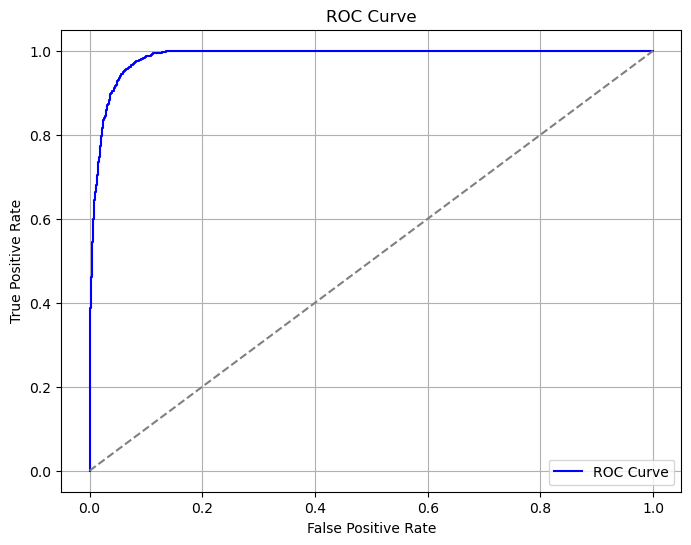

AUC Score: 0.9865


In [267]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# y_test: Actual labels
# y_prob: Predicted probabilities for the positive class (output of predict_proba or a similar method)

# Example:
# y_test = [0, 1, 0, 1, 0, 1]  # Actual labels for the test set
# y_prob = [0.1, 0.9, 0.2, 0.8, 0.3, 0.7]  # Predicted probabilities for the positive class

# Calculate FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random model
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Calculate AUC score
auc_score = roc_auc_score(y_test, predicted_probabilities)

# Print AUC score
print(f"AUC Score: {auc_score:.4f}")


In [268]:
# Calculate Gini coefficient
gini_coefficient = 2 * auc_score - 1

# Print the results
print(f"AUC Score: {auc_score:.4f}")
print(f"Gini Coefficient: {gini_coefficient:.4f}")

AUC Score: 0.9865
Gini Coefficient: 0.9729


AUC = 0.9865 and Gini = 0.9729 suggest that the model is performing at a very high level, making it suitable for applications where accurate classification is crucial.

In [269]:
# Save or Export Model Artifacts
import joblib

# Save the model
joblib.dump(model, 'xgboost_model.pkl')

['xgboost_model.pkl']

In [ ]:
# # Load the model
# model = joblib.load('xgboost_model.pkl')

# # Use model to make predictions
# # X_new is the new data you want to predict
# predictions = model.predict(X_new)